# Stiffness matrix, equivalent force vector and postprocess results of Euler Bernoulli beam

In [1]:
import sympy as sym
sym.init_printing()

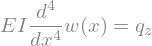

In [2]:
EI, q_z, x, L = sym.symbols('EI, q_z, x, L')
w = sym.Function('w')

ODE_bending = sym.Eq(w(x).diff(x, 4) *EI, q_z)
display(ODE_bending)

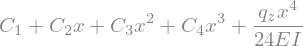

In [3]:
w = sym.dsolve(ODE_bending, w(x)).rhs
display(w)

In [4]:
phi = -w.diff(x)
kappa = phi.diff(x)
M = EI * kappa
V = M.diff(x)

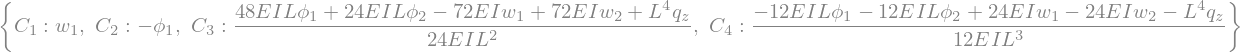

In [5]:
w_1, w_2, phi_1, phi_2 = sym.symbols('w_1, w_2, phi_1, phi_2')

eq1 = sym.Eq(w.subs(x,0),w_1)
eq2 = sym.Eq(w.subs(x,L),w_2)
eq3 = sym.Eq(phi.subs(x,0),phi_1)
eq4 = sym.Eq(phi.subs(x,L),phi_2)

sol = sym.solve([eq1, eq2, eq3, eq4 ], sym.symbols('C1, C2, C3, C4'))
display(sol)

In [6]:
F_1_z, F_2_z, T_1_y, T_2_y = sym.symbols('F_1_z, F_2_z, T_1_y, T_2_y')

eq5 = sym.Eq(-V.subs(sol).subs(x,0), F_1_z)
eq6 = sym.Eq(V.subs(sol).subs(x,L), F_2_z)
eq7 = sym.Eq(-M.subs(sol).subs(x,0), T_1_y)
eq8 = sym.Eq(M.subs(sol).subs(x,L), T_2_y)

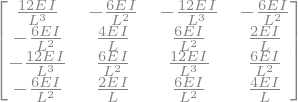

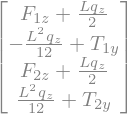

In [7]:
A, b = sym.linear_eq_to_matrix([eq5,eq7, eq6, eq8], [w_1, phi_1, w_2, phi_2])
display(A)
display(b)

In [8]:
K = sym.lambdify((L, EI), A)
print(K.__doc__)
print('Example of K with L=5 and EI=1000:\n', K(5,1000))

Created with lambdify. Signature:

func(L, EI)

Expression:

Matrix([[12*EI/L**3, -6*EI/L**2, -12*EI/L**3, -6*EI/L**2], [-6*EI/L**2,...

Source code:

def _lambdifygenerated(L, EI):
    return array([[12*EI/L**3, -6*EI/L**2, -12*EI/L**3, -6*EI/L**2], [-6*EI/L**2, 4*EI/L, 6*EI/L**2, 2*EI/L], [-12*EI/L**3, 6*EI/L**2, 12*EI/L**3, 6*EI/L**2], [-6*EI/L**2, 2*EI/L, 6*EI/L**2, 4*EI/L]])


Imported modules:


Example of K with L=5 and EI=1000:
 [[  96. -240.  -96. -240.]
 [-240.  800.  240.  400.]
 [ -96.  240.   96.  240.]
 [-240.  400.  240.  800.]]


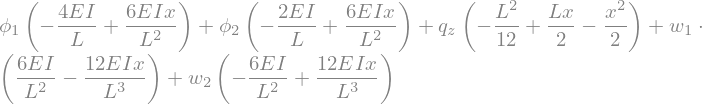

In [9]:
M_postprocess = sym.collect(M.subs(sol).expand(),[w_1,w_2,phi_1,phi_2, q_z])
display(M_postprocess)